In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
class DVBS2X:
    def __init__(self, num_symbols, samples_per_symbol, carrier_freq):
        self.num_symbols = num_symbols
        self.samples_per_symbol = samples_per_symbol
        self.carrier_freq = carrier_freq

    def generate_bpsk(self):
        bits = np.random.randint(0, 2, self.num_symbols)
        symbols = 2 * bits - 1  # Map 0 to -1 and 1 to 1
        return self.modulate(symbols), symbols, bits

    def generate_qpsk(self):
        bits = np.random.randint(0, 2, 2 * self.num_symbols)
        qpsk_map = {
            (0, 0): 1 + 1j, (0, 1): -1 + 1j,
            (1, 1): -1 - 1j, (1, 0): 1 - 1j
        }
        symbols = np.array([qpsk_map[tuple(bits[i:i+2])] for i in range(0, len(bits), 2)])
        return self.modulate(symbols), symbols, bits

    # Add methods for APSK modulation (omitted for brevity, you already have them)
    def generate_8apsk(self):
        return self._generate_apsk(8, 3, [1, 2.6], [1, 7])

    def generate_16apsk(self):
        return self._generate_apsk(16, 4, [1, 2.6], [4, 12])

    def generate_32apsk(self):
        return self._generate_apsk(32, 5, [1, 2.6, 4.15], [4, 12, 16])

    def generate_64apsk(self):
        return self._generate_apsk(64, 6, [1, 1.6, 2.4, 3.5], [4, 12, 20, 28])

    def generate_128apsk(self):
        return self._generate_apsk(128, 7, [1, 1.5, 2.2, 3.0, 3.8], [4, 12, 20, 40, 52])

    def generate_256apsk(self):
        return self._generate_apsk(256, 8, [1, 1.4, 1.9, 2.5, 3.2, 4.0], [4, 12, 20, 28, 60, 132])
    
    def _generate_apsk(self, m, bits_per_symbol, radii, points_per_ring):
        bits = np.random.randint(0, 2, bits_per_symbol * self.num_symbols)

        constellation = []
        for r, n in zip(radii, points_per_ring):
            for k in range(n):
                angle = 2 * np.pi * k / n
                constellation.append(r * np.exp(1j * angle))
        constellation = np.array(constellation)

        constellation /= np.sqrt(np.mean(np.abs(constellation)**2))

        symbols = np.zeros(self.num_symbols, dtype=complex)
        for i in range(self.num_symbols):
            bit_chunk = bits[i*bits_per_symbol:(i+1)*bits_per_symbol]
            symbol_index = int(''.join(map(str, bit_chunk)), 2)
            symbols[i] = constellation[symbol_index]

        return self.modulate(symbols), symbols, bits

    def modulate(self, symbols):
        t = np.arange(self.num_symbols * self.samples_per_symbol) / (self.carrier_freq * self.samples_per_symbol)
        upsampled = np.repeat(symbols, self.samples_per_symbol)
        carrier = np.exp(2j * np.pi * self.carrier_freq * t)
        signal = np.real(upsampled * carrier)
        return t, signal

    def add_noise(self, signal, snr_db):
        """ Add Gaussian noise to the signal based on the desired SNR in dB. """
        signal_power = np.mean(np.abs(signal)**2)
        snr_linear = 10 ** (snr_db / 10.0)
        noise_power = signal_power / snr_linear
        noise = np.sqrt(noise_power) * np.random.normal(size=signal.shape)
        noisy_signal = signal + noise
        return noisy_signal, noise

    def calculate_snr(self, signal, noise):
        """ Calculate the Signal-to-Noise Ratio (SNR) based on the signal and noise. """
        signal_power = np.mean(np.abs(signal)**2)
        noise_power = np.mean(np.abs(noise)**2)
        snr_linear = signal_power / noise_power
        snr_db = 10 * np.log10(snr_linear)
        return snr_db

    def plot_signal(self, t, signal, modulation_type, num_symbols_to_plot=10):
        """ Plot the signal for a limited number of symbols. """
        samples_to_plot = num_symbols_to_plot * self.samples_per_symbol
        plt.figure(figsize=(12, 6))
        plt.plot(t[:samples_to_plot], signal[:samples_to_plot])
        plt.title(f'{modulation_type} Modulated Signal with Noise (Zoomed-in on {num_symbols_to_plot} symbols)')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()

    def plot_constellation(self, symbols, modulation_type):
        """ Plot the constellation diagram. """
        plt.figure(figsize=(8, 8))
        plt.scatter(symbols.real, symbols.imag, c='r', alpha=0.5)
        plt.title(f'{modulation_type} Constellation Diagram')
        plt.xlabel('In-phase')
        plt.ylabel('Quadrature')
        plt.grid(True)
        plt.axis('equal')
        plt.show()


BPSK - Calculated SNR: 25.14 dB
BPSK - First 10 symbols: [ 1  1 -1 -1  1 -1  1 -1 -1 -1]


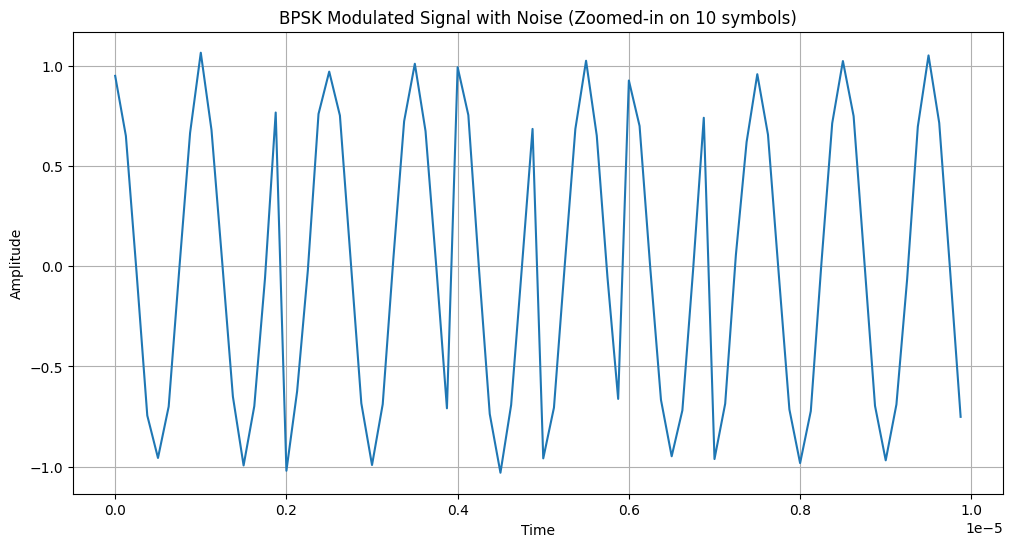


QPSK - Calculated SNR: 25.06 dB
QPSK - First 10 symbols: [-1.-1.j  1.-1.j -1.+1.j  1.-1.j -1.-1.j  1.-1.j -1.+1.j  1.-1.j -1.-1.j
 -1.+1.j]


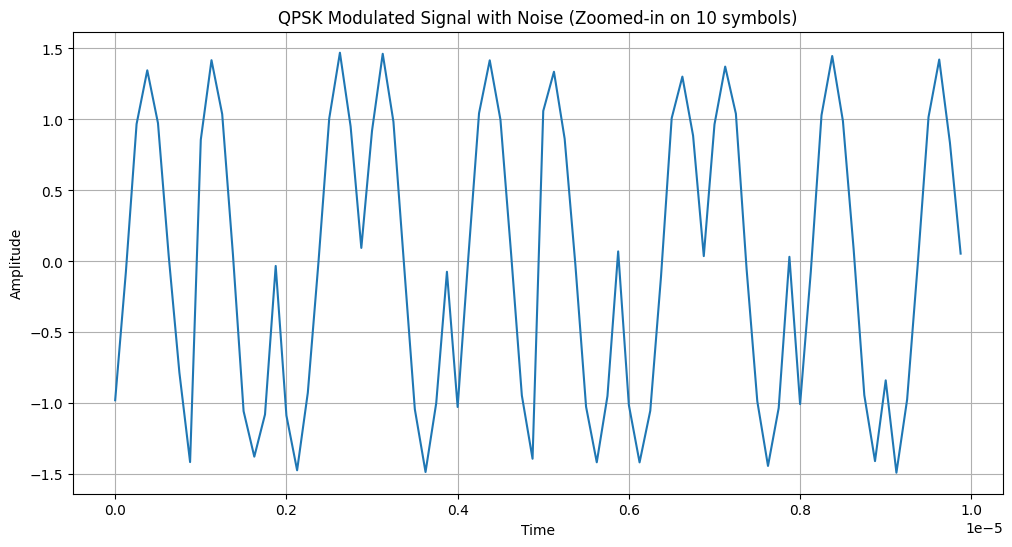


8-APSK - Calculated SNR: 24.96 dB
8-APSK - First 10 symbols: [-0.95315749-0.45901645j  0.65960545-0.82711907j -0.23541046-1.03140061j
 -0.95315749-0.45901645j  1.057925  +0.j          0.40689423+0.j
 -0.23541046-1.03140061j  1.057925  +0.j          0.40689423+0.j
  0.40689423+0.j        ]


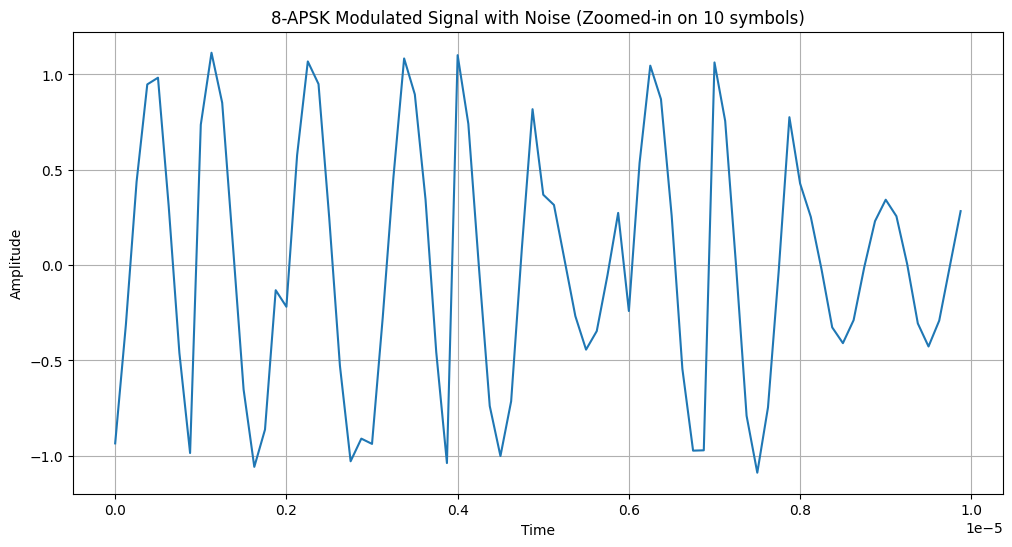


16-APSK - Calculated SNR: 25.06 dB
16-APSK - First 10 symbols: [ 2.65475862e-17+0.43355498j  4.33554985e-01+0.j
 -5.63621480e-01+0.97622104j  5.63621480e-01-0.97622104j
  2.65475862e-17+0.43355498j -5.63621480e-01+0.97622104j
  5.63621480e-01-0.97622104j -7.96427587e-17-0.43355498j
 -9.76221040e-01-0.56362148j  1.12724296e+00+0.j        ]


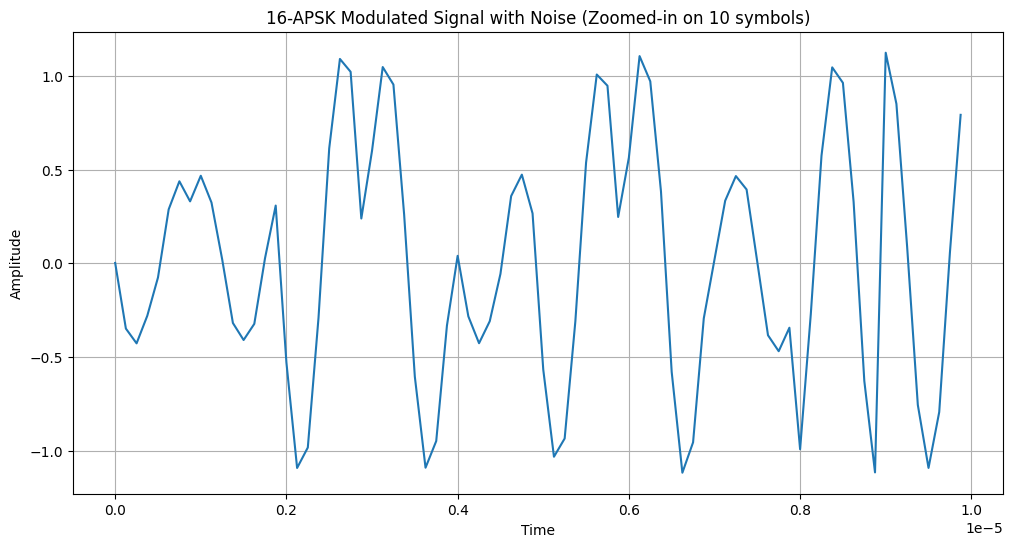


32-APSK - Calculated SNR: 25.05 dB
32-APSK - First 10 symbols: [ 4.73044193e-01-1.14202971j -1.42262166e-16-0.77443916j
  4.73044193e-01+1.14202971j -3.87219581e-01-0.67068399j
 -6.70683988e-01+0.38721958j  4.73044193e-01+1.14202971j
 -4.73044193e-01+1.14202971j -8.74071697e-01+0.8740717j
 -1.14202971e+00-0.47304419j  1.14202971e+00-0.47304419j]


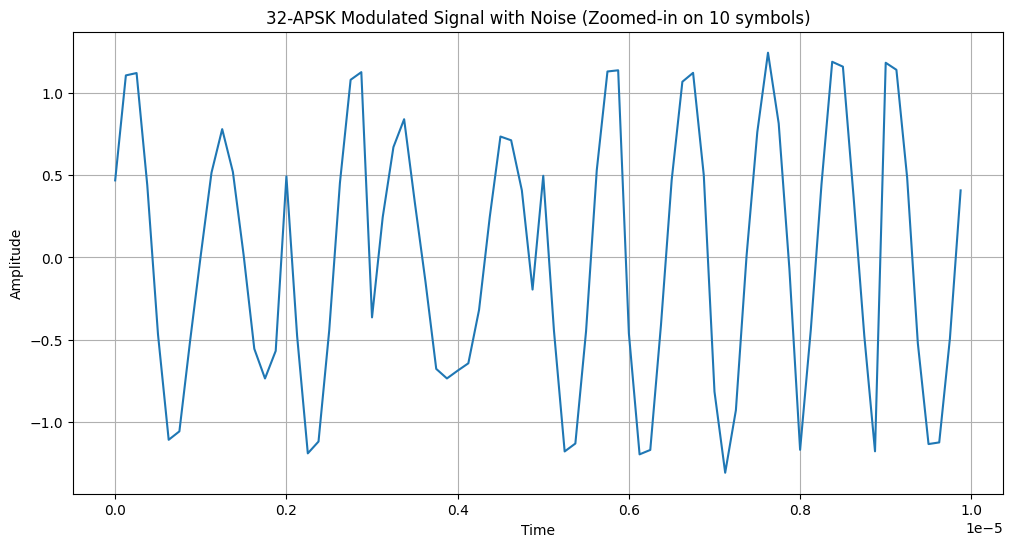


64-APSK - Calculated SNR: 24.96 dB
64-APSK - First 10 symbols: [-0.98601374-7.86319717e-01j  0.86479468+0.00000000e+00j
 -0.28826489+4.99289441e-01j -0.86479468+1.05906804e-16j
  0.82246861+2.67236252e-01j  1.13626491+5.47196342e-01j
  0.69963359+5.08313559e-01j -0.98601374-7.86319717e-01j
 -0.28826489-4.99289441e-01j -0.28063426+1.22953902e+00j]


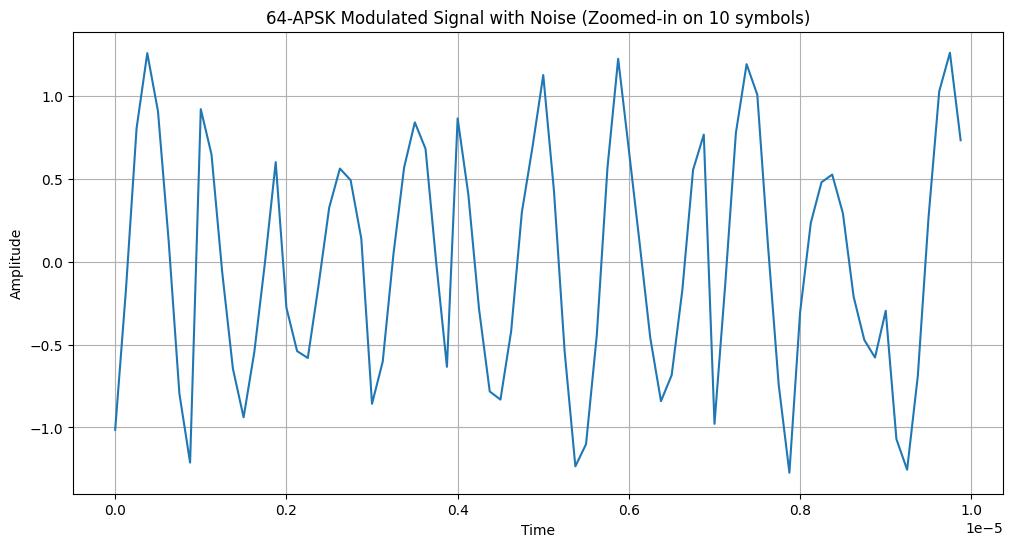


128-APSK - Calculated SNR: 24.91 dB
128-APSK - First 10 symbols: [ 9.64376629e-01+0.j          6.81917254e-01+0.68191725j
  6.93915929e-01+1.00531078j  3.21458876e-01+0.j
 -1.77153113e-16-0.96437663j -4.17587330e-01-0.24109416j
  9.14338611e-01-0.81003333j  4.82188314e-01+0.j
  1.21263730e+00+0.14724083j  1.47240826e-01-1.2126373j ]


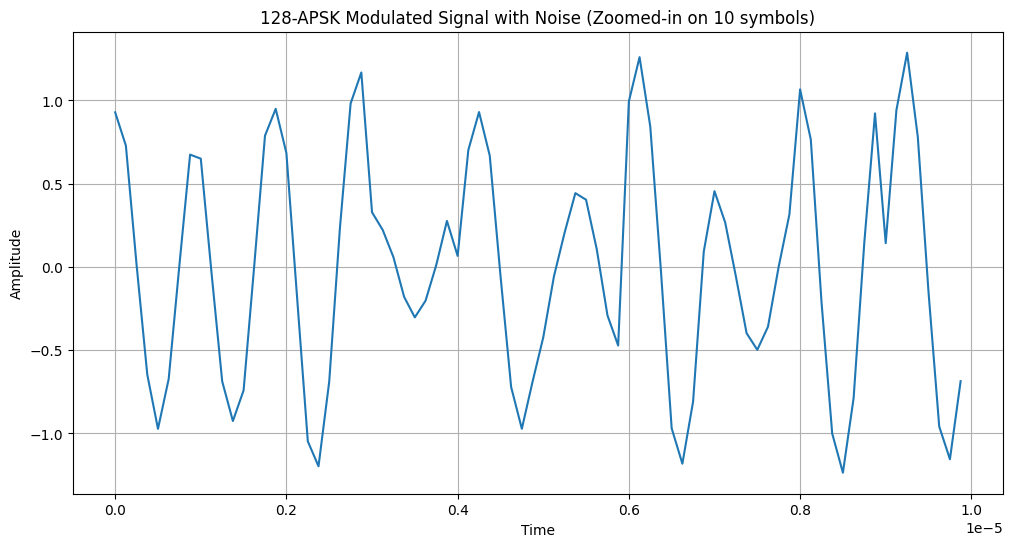


256-APSK - Calculated SNR: 25.07 dB
256-APSK - First 10 symbols: [ 0.40888986+0.j          0.38013826-0.85380451j  1.06268371+0.48531139j
  0.32913596+1.12093413j  1.01174001-0.58412837j -0.84550716-0.80618945j
 -1.14714481-0.22109404j  0.71185381-0.16247599j  0.7221684 -0.91831182j
 -0.95163384+0.67765539j]


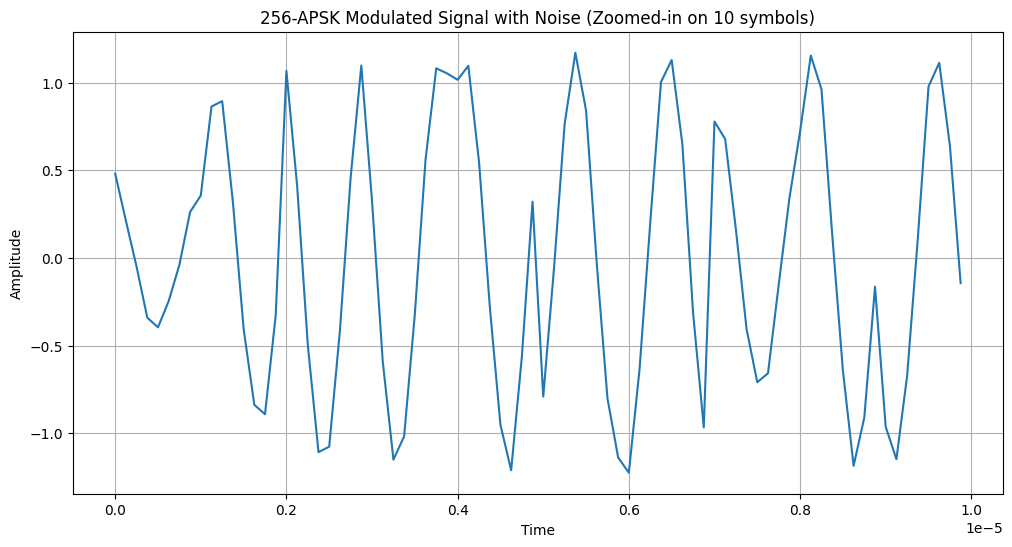

In [13]:
dvbs2x = DVBS2X(num_symbols=1000, samples_per_symbol=8, carrier_freq=1e6)

# List of modulation schemes with associated functions
modulation_schemes = [
    ('BPSK', dvbs2x.generate_bpsk),
    ('QPSK', dvbs2x.generate_qpsk),
    ('8-APSK', dvbs2x.generate_8apsk),
    ('16-APSK', dvbs2x.generate_16apsk),
    ('32-APSK', dvbs2x.generate_32apsk),
    ('64-APSK', dvbs2x.generate_64apsk),
    ('128-APSK', dvbs2x.generate_128apsk),
    ('256-APSK', dvbs2x.generate_256apsk)
]

# SNR in dB
snr_db = 25

# Loop through each modulation scheme, add noise, and calculate SNR
for name, func in modulation_schemes:
    # Generate the modulated signal, symbols, and bits
    (t, signal), symbols, bits = func()

    # Add noise to the signal based on the specified SNR
    noisy_signal, noise = dvbs2x.add_noise(signal, snr_db)

    # Calculate the actual SNR after adding noise
    calculated_snr = dvbs2x.calculate_snr(signal, noise)
    print(f"\n{name} - Calculated SNR: {calculated_snr:.2f} dB")
    
    # Print the first 10 symbols
    print(f"{name} - First 10 symbols: {symbols[:10]}")
    
    # Plot the noisy signal
    dvbs2x.plot_signal(t, noisy_signal, name)

    # Optionally, plot the constellation diagram
    # dvbs2x.plot_constellation(symbols, name)